In [2]:
# Import libraries 
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import OrderedDict
import matplotlib.pyplot as plt
import string
from statistics import mean

In [3]:
# Import CSV Data Set(s)
fatal_crashes = pd.read_csv('fatalcrashesdecember2017.csv')
fatalities = pd.read_csv('fatalitiesdecember2017.csv')

In [41]:
# Define Australian States and Territories
states_and_territories = {'NSW': 'New South Wales', 'NT': 'Northern Territory', 'SA': 'South Australia', 'TAS': 'Tasmania',
                          'VIC': 'Victoria', 'WA': 'Western Australia', 'QLD': 'Queensland'}

In [5]:
# Define Months
months = {'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'August', '9': 'September',
         '10': 'October', '11': 'November', '12': 'December'}

In [6]:
# Tally up number of fatal crashes per year
fatal_crashes_by_year = defaultdict(int)
for i in fatal_crashes.Year:
    fatal_crashes_by_year[i] += fatal_crashes.Number_of_Fatalities.loc[i]

In [7]:
# Tally up number of road deaths
fatalities_by_year = defaultdict(int)
for i in fatalities.Year:
    fatalities_by_year[i] += 1

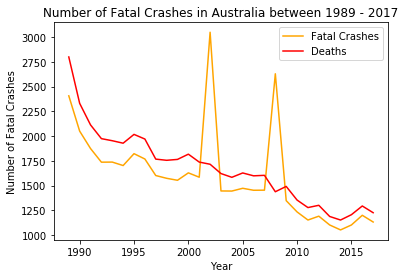

We can see the general trend decreases over time with the lowest recorded number of fatal crashes and road deaths in the year 2014


In [8]:
# Plot between Fatal Crashes against Road Deaths
plt.clf()

plt.plot(fatal_crashes_by_year.keys(),fatal_crashes_by_year.values(), c = 'orange')
plt.plot(fatalities_by_year.keys(), fatalities_by_year.values(), c = 'red')

plt.title('Number of Fatal Crashes in Australia between 1989 - 2017')
plt.legend(('Fatal Crashes', 'Deaths'))
plt.ylabel('Number of Fatal Crashes')
plt.xlabel('Year')

plt.show()

print('We can see the general trend decreases over time with the lowest recorded number of fatal crashes and road deaths in the year 2014')

In [9]:
# Tally of valid fatal crashes according to the speed limit
speed_limits = defaultdict(int)
for i in fatal_crashes.Speed_Limit:
    try:
        if i == ' ':
            pass
        if int(i) <= 130 and bool(i.endswith('0') or i.endswith('5')):
            speed_limits[int(i)] += 1
    except:
        pass

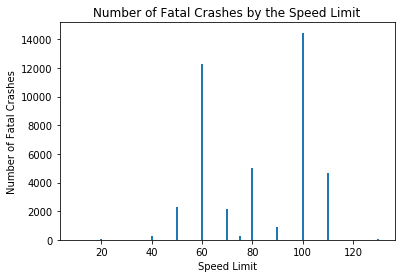

We can see that the most crashes occur at 100km/hr, 60km/hr and 80km/hr


In [10]:
# Plot between the number of fatal crashes against speed limits
plt.clf()

plt.bar(speed_limits.keys(), speed_limits.values())

plt.title('Number of Fatal Crashes by the Speed Limit')
plt.ylabel('Number of Fatal Crashes')
plt.xlabel('Speed Limit')

plt.show()
print('We can see that the most crashes occur at 100km/hr, 60km/hr and 80km/hr')

In [11]:
# State Specific Crashes
vic_crashes = defaultdict(int)
nsw_crashes = defaultdict(int)
wa_crashes = defaultdict(int)
tas_crashes = defaultdict(int)
sa_crashes = defaultdict(int)
nt_crashes = defaultdict(int)
qld_crashes = defaultdict(int)

for i in fatal_crashes.loc[fatal_crashes.State == 'VIC'].Year:
    vic_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'NSW'].Year:
    nsw_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'WA'].Year:
    wa_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'TAS'].Year:
    tas_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'SA'].Year:
    sa_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'NT'].Year:
    nt_crashes[i] += 1
for i in fatal_crashes.loc[fatal_crashes.State == 'QLD'].Year:
    qld_crashes[i] += 1

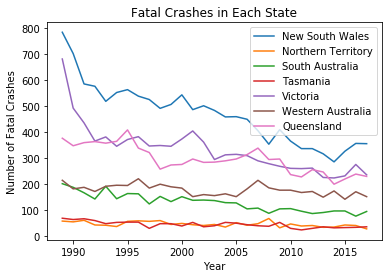

It can be observed that New South Wales leads by a large margin in the number of fatal crashes compared to other states


In [42]:
# Plot of fatal crashes between each state
plt.clf()


plt.plot(nsw_crashes.keys(), nsw_crashes.values())
plt.plot(nt_crashes.keys(), nt_crashes.values())
plt.plot(sa_crashes.keys(), sa_crashes.values())
plt.plot(tas_crashes.keys(), tas_crashes.values())
plt.plot(vic_crashes.keys(), vic_crashes.values())
plt.plot(wa_crashes.keys(), wa_crashes.values())
plt.plot(qld_crashes.keys(), qld_crashes.values())


plt.legend(states_and_territories.values())
plt.title('Fatal Crashes in Each State')
plt.ylabel('Number of Fatal Crashes')
plt.xlabel('Year')

plt.show()

print('It can be observed that New South Wales leads by a large margin in the number of fatal crashes compared to other states')

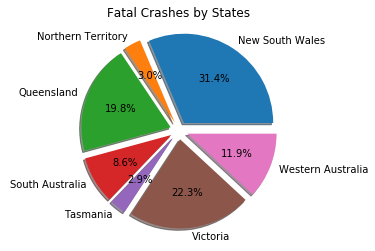

In [13]:
# Pie chart of fatal crashes by States
plt.clf()

crashes_by_states = [sum(nsw_crashes.values()), sum(nt_crashes.values()), sum(qld_crashes.values()), sum(sa_crashes.values()),
                    sum(tas_crashes.values()), sum(vic_crashes.values()), sum(wa_crashes.values())]

plt.pie(crashes_by_states, labels=sorted(states_and_territories.values()), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
        shadow = True, autopct='%1.1f%%')

plt.title('Fatal Crashes by States')
plt.axis('equal')

plt.show()

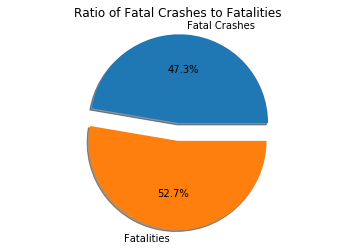

The correlation for crashing to deaths show that you are more likely to die given you are in a fatal crash 


In [14]:
# Pie chart between the ratio of fatalities to fatal crashes
plt.clf()

plt.pie([len(fatal_crashes), len(fatalities)], labels = ['Fatal Crashes', 'Fatalities'],
        explode = (0.1, 0.1), shadow = True, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Ratio of Fatal Crashes to Fatalities')

plt.show()

print('The correlation for crashing to deaths show that you are more likely to die given you are in a fatal crash ')

In [15]:
# Averages of crashes in accordance to the month
temp = []
avg_month_year_crashes = OrderedDict()
month_year_crashes = defaultdict(int)
for i in range(len(fatal_crashes.Year)):
    month_year_crashes[(fatal_crashes.Year.iloc[i], fatal_crashes.Month.iloc[i])] +=1
for i in range(12):    
    temp.append(mean([i for i in month_year_crashes.values()][i::12]))
for i in range(12):
    avg_month_year_crashes[months[str(i + 1)]] = temp[i]

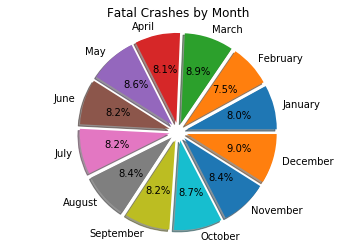

December shows the most number of fatal crashes which is likely caused due to the holiday season where thereare more cars on the road. Februrary shows the least amount of fatal crashes


In [16]:
# Very bad pie chart representation of crashes according to the month because the bar plot axis 
# is sorted alphabetically, not chronologically. fml
plt.clf()

plt.pie(avg_month_year_crashes.values(), labels = avg_month_year_crashes.keys(), 
        explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), shadow = True, autopct='%1.1f%%')

plt.title('Fatal Crashes by Month')
plt.axis('equal')

plt.show()

print('December shows the most number of fatal crashes which is likely caused due to the holiday season where there' + 
      'are more cars on the road. Februrary shows the least amount of fatal crashes')

In [60]:
# Types of vehicles that were involved in fatal crashes
vehicles = {'Buses': fatal_crashes.loc[fatal_crashes.Bus_Involvement == 'Yes'].size,
            'Heavy Trucks': fatal_crashes.loc[fatal_crashes.Heavy_Rigid_Truck_Involvement == 'Yes'].size,                          
            'Articulated Trucks': fatal_crashes.loc[fatal_crashes.Articulated_Truck_Involvement == 'Yes'].size}
vehicles['Cars'] = int(fatal_crashes.size - vehicles['Buses'] - vehicles['Heavy Trucks'] - vehicles['Articulated Trucks'])

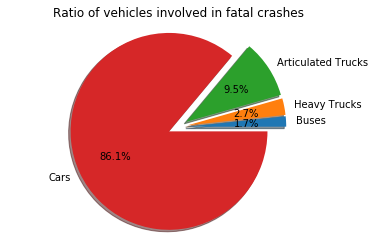

In [63]:
# Pie chart representing the ratio of vehicles involved in fatal crashes
plt.clf()

plt.pie(vehicles.values(), labels = vehicles.keys(),
        explode = (0.1, 0.1, 0.1, 0.1), shadow = True, autopct='%1.1f%%')

plt.title('Ratio of vehicles involved in fatal crashes')
plt.axis('equal')

plt.show()